Gefundene .tsv-Dateien: 7
Gefundene .gff-Dateien: 14

Verarbeite: Brandao_LB_full_raw_counts.tsv


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21408\1438746563.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpm['mean_tpm'] = df_tpm.mean(axis=1)


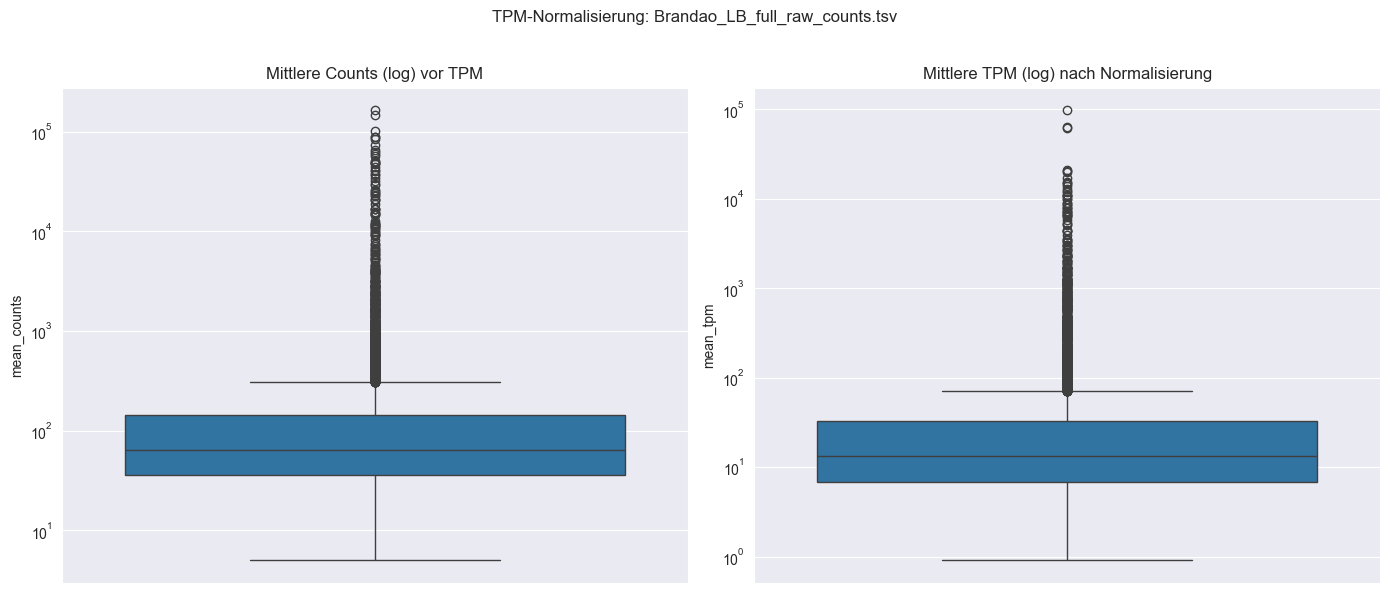

Gespeichert: ../data/normalized_data\Brandao_LB_full_raw_counts_TPM.tsv

Verarbeite: Ceyssens_non-directional_full_raw_counts.tsv


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21408\1438746563.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpm['mean_tpm'] = df_tpm.mean(axis=1)


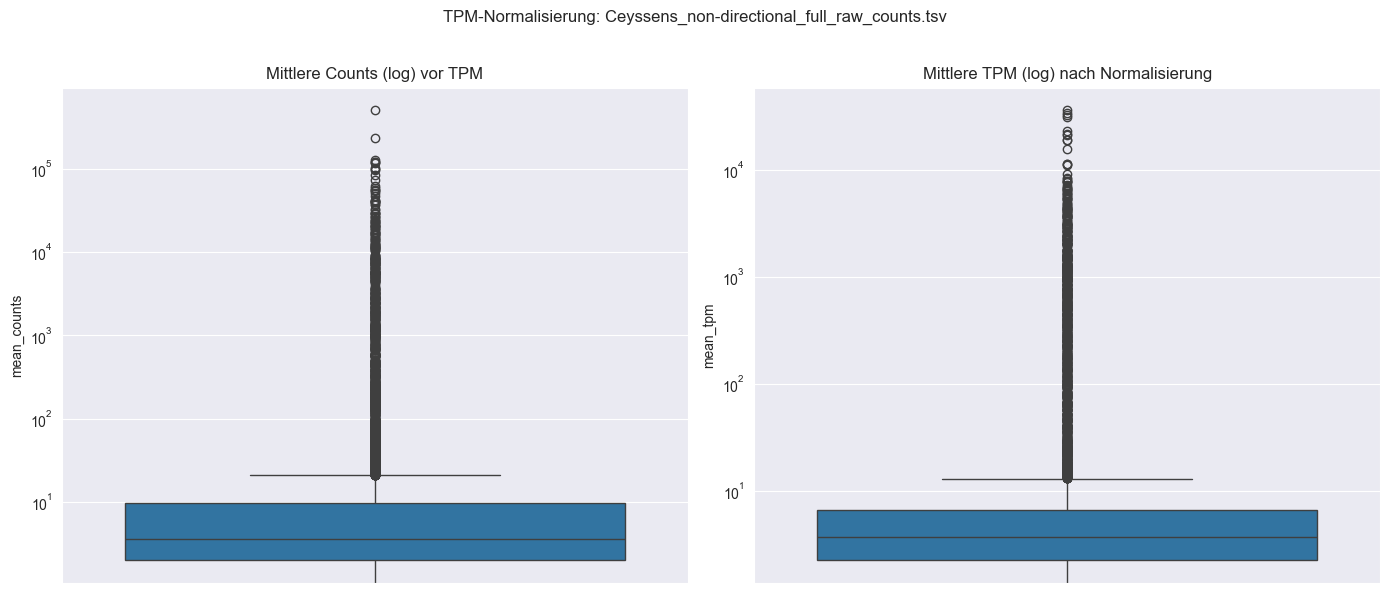

Gespeichert: ../data/normalized_data\Ceyssens_non-directional_full_raw_counts_TPM.tsv

Verarbeite: Guegler_T7_minusToxIN_full_raw_counts.tsv


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21408\1438746563.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpm['mean_tpm'] = df_tpm.mean(axis=1)


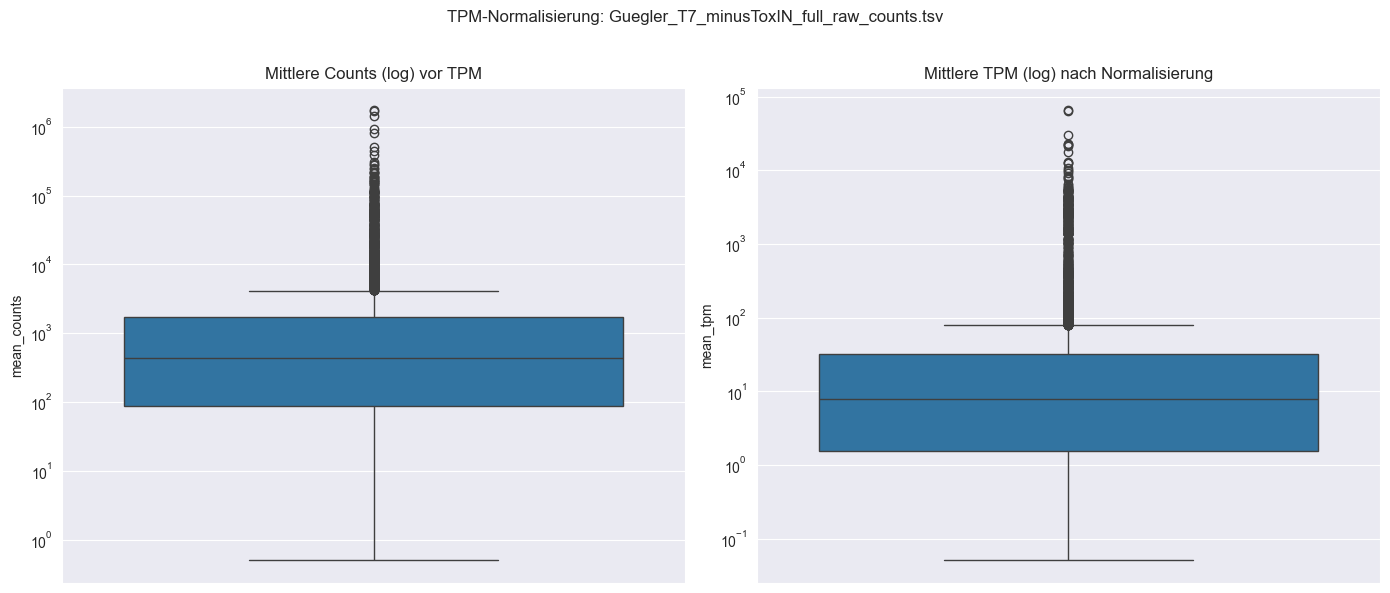

Gespeichert: ../data/normalized_data\Guegler_T7_minusToxIN_full_raw_counts_TPM.tsv

Verarbeite: Leskinen_full_raw_counts.tsv


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21408\1438746563.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpm['mean_tpm'] = df_tpm.mean(axis=1)


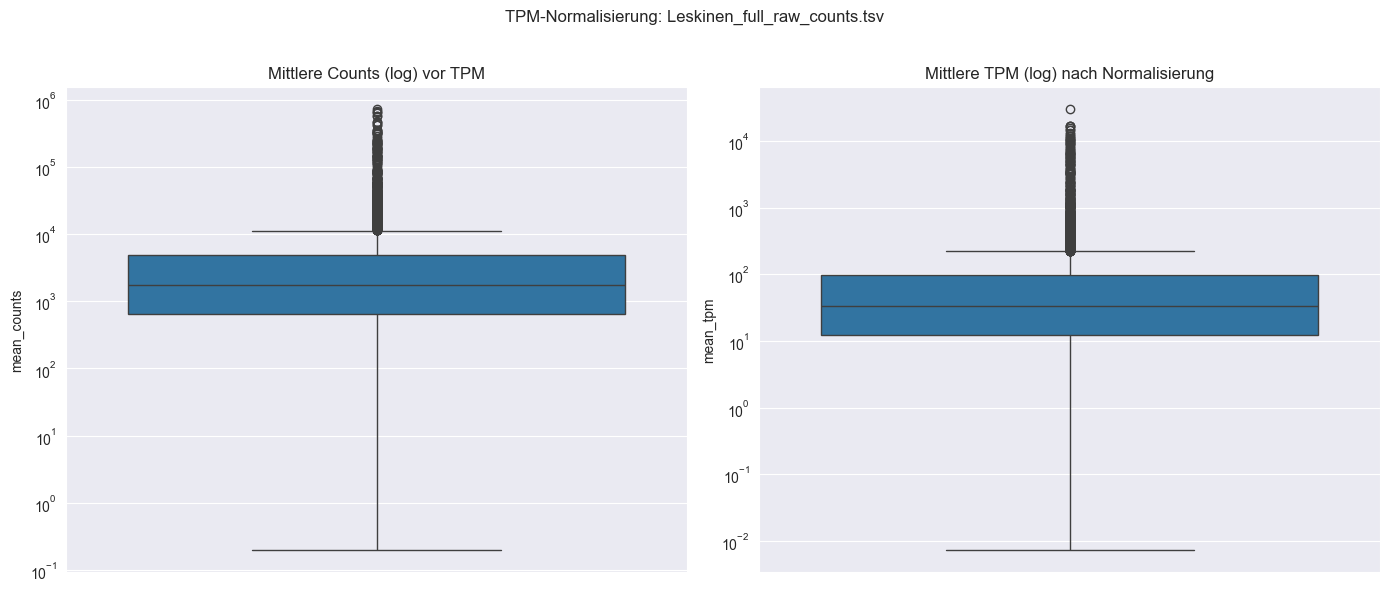

Gespeichert: ../data/normalized_data\Leskinen_full_raw_counts_TPM.tsv

Verarbeite: Li_full_raw_counts.tsv


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21408\1438746563.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpm['mean_tpm'] = df_tpm.mean(axis=1)


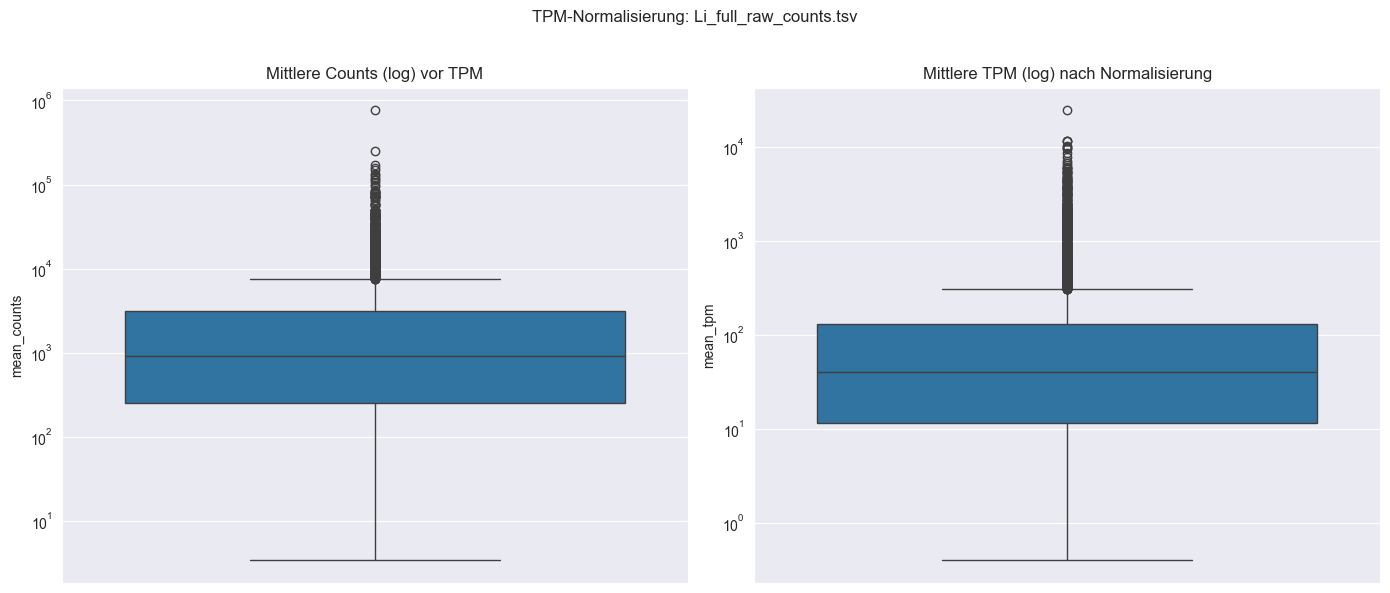

Gespeichert: ../data/normalized_data\Li_full_raw_counts_TPM.tsv

Verarbeite: Sprenger_VC_delta_tdh_VP882_WT_full_raw_counts.tsv


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21408\1438746563.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpm['mean_tpm'] = df_tpm.mean(axis=1)


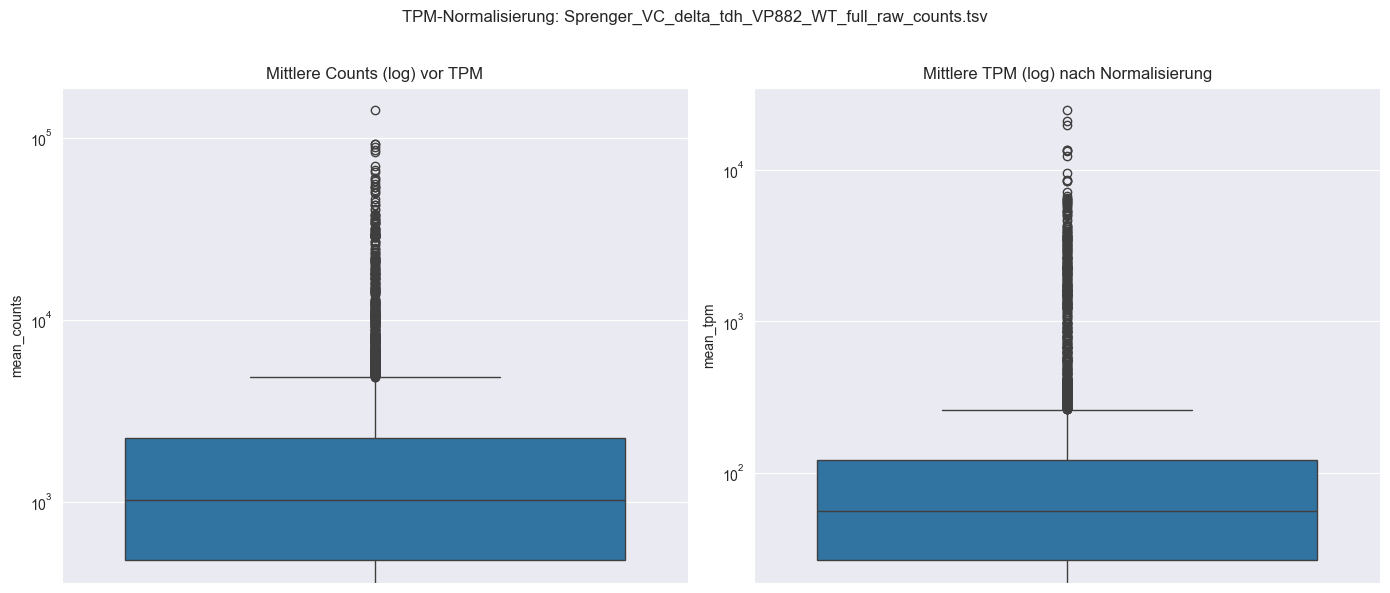

Gespeichert: ../data/normalized_data\Sprenger_VC_delta_tdh_VP882_WT_full_raw_counts_TPM.tsv

Verarbeite: Wolfram-Schauerte_full_raw_counts.tsv


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_21408\1438746563.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tpm['mean_tpm'] = df_tpm.mean(axis=1)


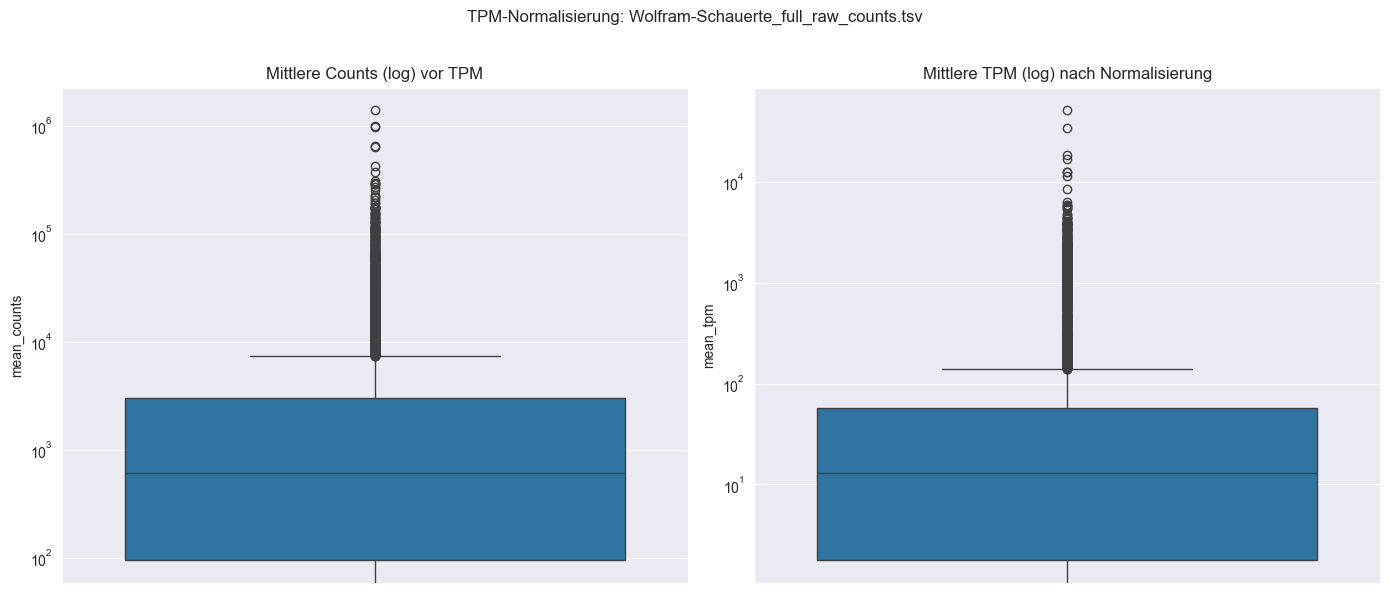

Gespeichert: ../data/normalized_data\Wolfram-Schauerte_full_raw_counts_TPM.tsv


In [5]:
# TPM-Normalisierung von Count-Daten mit Vorher-Nachher-Visualisierung

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Eingabe- und Ausgabeverzeichnisse definieren
input_dir = '../data/bold_binders'
output_dir = '../data/normalized_data'
os.makedirs(output_dir, exist_ok=True)

# Rekursive Suche nach .tsv-Dateien
def find_tsv_files(directory):
    tsv_files_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.tsv'):
                full_path = os.path.join(root, file)
                tsv_files_list.append(full_path)
    return tsv_files_list

tsv_files = find_tsv_files(input_dir)
print(f"Gefundene .tsv-Dateien: {len(tsv_files)}")

# Rekursive Suche nach .gff-Dateien
def find_gff_files(directory):
    gff_files_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.gff3'):
                full_path = os.path.join(root, file)
                gff_files_list.append(full_path)
            if file.endswith('.gff'):
                full_path = os.path.join(root, file)
                gff_files_list.append(full_path)
    return gff_files_list

gff_files = find_gff_files(input_dir)
print(f"Gefundene .gff-Dateien: {len(gff_files)}")

#Extraktion der Genlänge aus der GFF-Datei
def extract_gene_lengths_from_gff(gff_file):
    gene_lengths = {}
    try:
        with open(gff_file, 'r') as f:
            for line in f:
                if line.startswith('#'):
                    continue
                parts = line.strip().split('\t')
                if len(parts) >= 9 and parts[2] == 'gene':
                    # Berechne die Genlänge (Ende - Start + 1)
                    start = int(parts[3])
                    end = int(parts[4])
                    #'+1' da sowohl Start- als auch End-Positionen enthalten sind
                    length = end - start + 1

                    # Extrahiere die Gen-ID aus dem Attributfeld
                    attr_dict = dict(item.split('=') for item in parts[8].split(';') if '=' in item)
                    gene_id = attr_dict.get('ID', '').replace('gene:', '')

                    if gene_id:
                        gene_lengths[gene_id] = length
    except Exception as e:
        print(f"Fehler beim Lesen der GFF-Datei {gff_file}: {e}")
    return gene_lengths


# TPM-Normalisierung mit berechneten Gen-Längen/ 1000, falls keine Gen-Länge gefunden werden kann
def normalize_tpm(df, count_cols, feature_lengths):
    # Schritt 1: RPK berechnen (Reads Per Kilobase)
    rpk = pd.DataFrame()
    for col in count_cols:
        rpk[col] = df[col] / (feature_lengths / 1000)

    # Schritt 2: Skalierungsfaktor pro Sample (Summe aller RPKs pro Spalte)
    scaling_factors = rpk.sum(axis=0) / 1e6

    # Schritt 3: TPM berechnen
    tpm = rpk.divide(scaling_factors, axis=1)
    return tpm


# Visualisierung: Boxplots Vorher-Nachher

def visualize_tpm(df_original, df_tpm, count_cols, file_path):
    df_original['mean_counts'] = df_original[count_cols].mean(axis=1)
    df_tpm['mean_tpm'] = df_tpm.mean(axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.boxplot(data=df_original, y='mean_counts', ax=axs[0])
    axs[0].set_yscale('log')
    axs[0].set_title('Mittlere Counts (log) vor TPM')

    sns.boxplot(data=df_tpm, y='mean_tpm', ax=axs[1])
    axs[1].set_yscale('log')
    axs[1].set_title('Mittlere TPM (log) nach Normalisierung')

    plt.suptitle(f"TPM-Normalisierung: {os.path.basename(file_path)}")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Anwendung auf alle Dateien
for file_path in tsv_files:
    try:
        df = pd.read_csv(file_path, sep='\t')

        gene_col = df.columns[0]
        entity_col = df.columns[-2]
        symbol_col = df.columns[-1]
        count_cols = df.columns[1:-2]

        print(f"\nVerarbeite: {os.path.basename(file_path)}")

        # Gene-Längen aus der entsprechenden GFF-Datei extrahieren
        gene_lengths = {}
        for gff_file in gff_files:
            gene_lengths.update(extract_gene_lengths_from_gff(gff_file))

        # Füge Gene-Length Spalte hinzu
        df['gene_length'] = df[gene_col].map(gene_lengths).fillna(1000)  # Default 1000 wenn keine Länge gefunden

        # TPM-Normalisierung mit tatsächlichen Gen-Längen
        df_tpm = normalize_tpm(df, count_cols, df['gene_length'])


        # Kombiniere mit Metadaten zur Speicherung
        df_tpm[gene_col] = df[gene_col]
        df_tpm['gene_length'] = df['gene_length']
        df_tpm[entity_col] = df[entity_col]
        df_tpm[symbol_col] = df[symbol_col]

        # Spalten sortieren
        ordered_cols = [gene_col] + list(count_cols) + ['gene_length', entity_col, symbol_col]
        df_tpm = df_tpm[ordered_cols]

        # Visualisierung Vorher-Nachher
        visualize_tpm(df, df_tpm[count_cols], count_cols, file_path)

        # Speichern
        out_path = os.path.join(output_dir, os.path.basename(file_path).replace('.tsv', '_TPM.tsv'))
        df_tpm.to_csv(out_path, sep='\t', index=False)
        print(f"Gespeichert: {out_path}")

    except Exception as e:
        print(f"Fehler bei Datei {file_path}: {e}")